# Clustering based on numerical fileds

## Customer segmentation clustering

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('hotel_dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   booking_id           134590 non-null  object 
 1   property_id          134590 non-null  int64  
 2   booking_date         134590 non-null  object 
 3   check_in_date        134590 non-null  object 
 4   checkout_date        134590 non-null  object 
 5   no_guests            134590 non-null  int64  
 6   room_category        134590 non-null  object 
 7   booking_platform     134590 non-null  object 
 8   ratings_given        134590 non-null  float64
 9   booking_status       134590 non-null  object 
 10  revenue_generated    134590 non-null  int64  
 11  revenue_realized     134590 non-null  int64  
 12  property_name        134590 non-null  object 
 13  property_category    134590 non-null  object 
 14  city                 134590 non-null  object 
 15  room_class       

### sampling 7000 data for clustering from 1 lakh records

In [6]:
df_7000 = df.sample(n=7000, random_state=42)

### extracting numerical columns as features and performing Standard Scaling on numerical data

In [7]:
features = df_7000[['no_guests', 'successful_bookings', 'ratings_given', 'revenue_realized']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### finding numer of cluster i.e value of k using elbow method

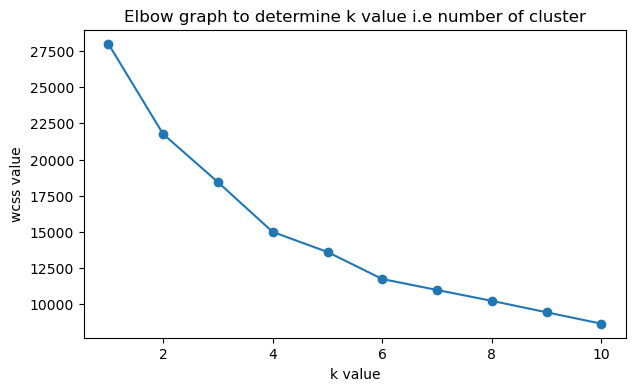

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=21)
  kmeans.fit(scaled_features)
  wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow graph to determine k value i.e number of cluster')
plt.xlabel('k value')
plt.ylabel('wcss value')
plt.show()

### K-Means Clustering

In [13]:
kmeans = KMeans(n_clusters=6, random_state=42)
df_7000['customer_cluster'] = kmeans.fit_predict(scaled_features)

### applying Principal Component Analysis to reduce to 2D for visualization

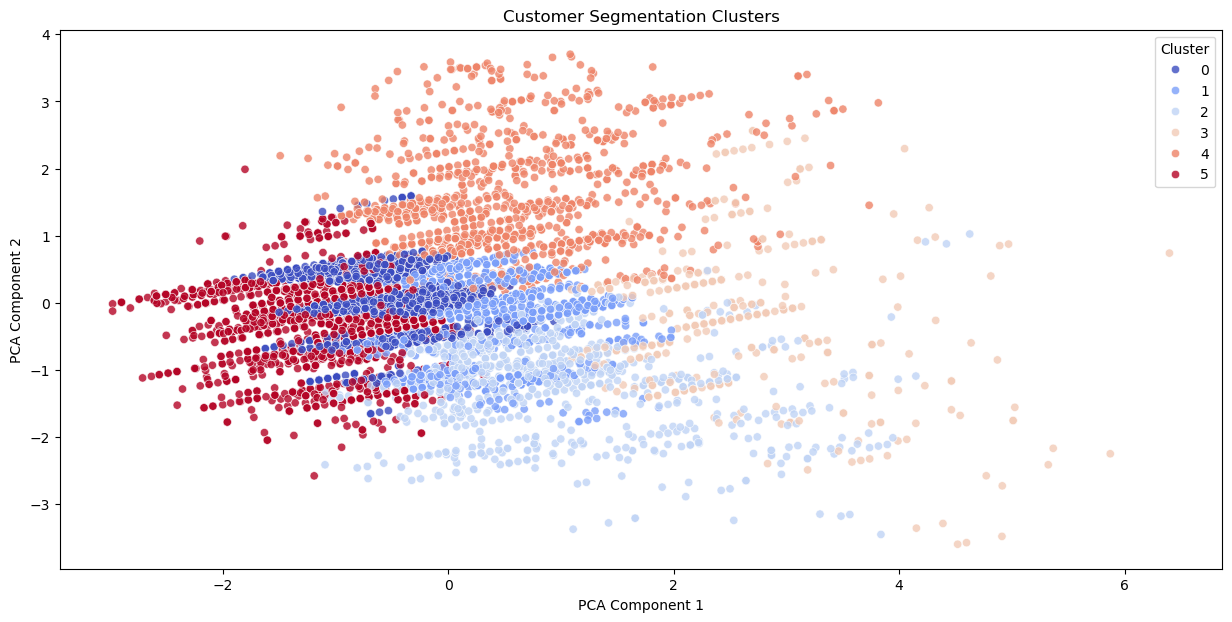

In [21]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(15, 7))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df_7000['customer_cluster'], palette='coolwarm', alpha=0.8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation Clusters')
plt.legend(title="Cluster")
plt.show()

1. Budget Customers (Clusters 0 & 1 - Blue): Low spending and engagement; require discounts or loyalty programs to increase bookings.
2. High-Value Customers (Clusters 2 & 3 - Orange): Frequent bookers with high revenue contribution; ideal for premium services and VIP retention strategies.
3. Mixed Behavior Customers (Clusters 4 & 5 - Red): Unpredictable booking patterns; targeted marketing or seasonal offers can improve engagement.

## City Based Clustering

### sampling 7000 data for clustering from 1 lakh records

In [57]:
df_city_7000 = df.sample(n=7000, random_state=42)

### extracting features and performing Standard Scaling on numerical data

In [58]:
# Selecting features for clustering
city_features = ['successful_bookings', 'revenue_realized', 'capacity']

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_city_7000[city_features])

### K-Means Clustering absed on City

In [59]:
# Performing KMeans clustering on city-level data
city_clusters = df.groupby('city')[['successful_bookings', 'revenue_realized', 'capacity']].sum().reset_index()
scaled_city_data = scaler.fit_transform(city_clusters[['successful_bookings', 'revenue_realized', 'capacity']])

kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust clusters as needed
city_clusters['city_cluster'] = kmeans.fit_predict(scaled_city_data)

In [60]:
# Assign actual city names instead of numeric clusters
city_clusters['city_label'] = city_clusters['city']

# Merge city labels back into the main dataframe
df_city_7000 = df_city_7000.merge(city_clusters[['city', 'city_label']], on='city', how='left')

### applying Principal Component Analysis to reduce to 2D for visualization

In [61]:
# Apply PCA for 2D visualization on the full dataset
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Adding PCA results to dataframe
df_city_7000['PCA1'] = pca_data[:, 0]
df_city_7000['PCA2'] = pca_data[:, 1]

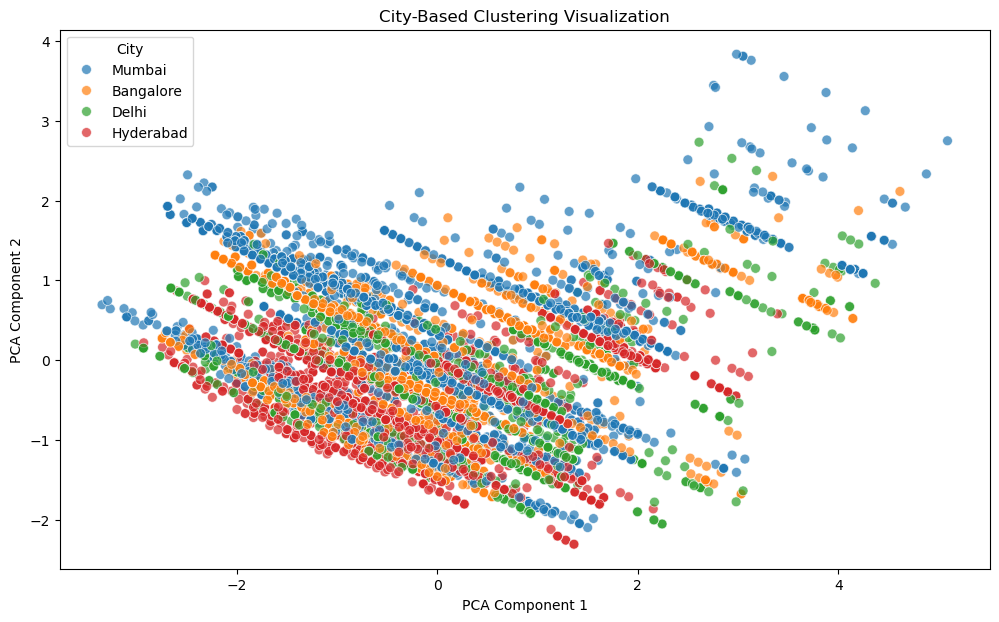

In [62]:
# Scatter Plot with city names as labels
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df_city_7000['PCA1'], 
                y=df_city_7000['PCA2'], 
                hue=df_city_7000['city_label'],  # Using city names as labels
                palette='tab10', 
                s=50,  
                alpha=0.7)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("City-Based Clustering Visualization")
plt.legend(title="City")
plt.show()

Mumbai has a mix of high and low bookings, showing diverse customer behavior. Bangalore and Delhi have steady bookings with mid-range revenue. Hyderabad has more budget-friendly bookings, indicating potential for growth with better pricing strategies.